# Rudra Kumar Verma
## Task 2- Predict the percentage of marks of an student based on the number of study hours


In [17]:
#Importing the necessary libraries
import pandas as pd
from pandas_visual_analysis import VisualAnalysis
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn import metrics  
import numpy as np
import matplotlib.pyplot as plt


In [18]:
#Importing the data
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
marks=pd.read_csv(url)

In [19]:
marks.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [20]:
#Checking for the data types
marks.dtypes

Hours     float64
Scores      int64
dtype: object

In [21]:
#Performing EDA
VisualAnalysis(marks)

In [22]:
#Checking for null values
marks.isnull().sum()

Hours     0
Scores    0
dtype: int64

# From the above scatterplot, we can establish that there exists a positive correlation among the variables. 
## Therefore, we can apply linear regression algoritm to this problem.

In [23]:
#Splitting the dataset into train and test parts
X = marks.drop("Scores", axis = "columns")
Y= marks.drop("Hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", Y.shape)

shape of X =  (25, 1)
shape of y =  (25, 1)


In [24]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", Y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", Y_test.shape)

shape of X_train =  (20, 1)
shape of y_train =  (20, 1)
shape of X_test =  (5, 1)
shape of y_test =  (5, 1)


## Applying Linear Regression


In [25]:
#Y= M*X+C
lr = LinearRegression()

In [26]:
lr.fit(X_train,Y_train)

LinearRegression()

In [27]:
#Coefficient of the line of best fit
lr.coef_

array([[9.56433743]])

In [28]:
#Intercept of the line of best fit
lr.intercept_

array([2.70197068])

# We have the following values-
## Slope- 9.57
## Intercept- 2.70

In [29]:
#Predicting the Y values
Y_pred=lr.predict(X_test)
Y_pred

array([[55.30582657],
       [76.34736893],
       [68.69589898],
       [82.08597139],
       [28.52568176]])

# Comparing the actual values with the predicted values

In [30]:
pd.DataFrame(np.c_[X_test, Y_test, Y_pred], columns = ["Hours", "Scores_original","Scores_predicted"])

,Hours,Scores_original,Scores_predicted
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


## Evaluating the model
### In order to evaluate the model mean squared error has been used

In [31]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.642239029818247


## What will be predicted score if a student studies for 9.25 hrs/ day?

In [32]:
#We have, slope= 9.57 and the intercept= 2.70
#Fitting the values in the regression line, we have
Marks=(9.57*9.25)+2.70
print('The predicted marks are',Marks)

The predicted marks are 91.22250000000001


# Plotting the regression line

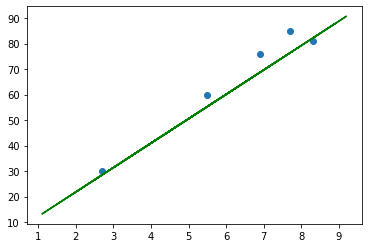

In [33]:
plt.scatter(X_test, Y_test)
plt.plot(X_train, lr.predict(X_train), color = "g")